In [11]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [3]:
files = glob('./*.csv')
files

['.\\simulation_data.csv',
 '.\\simulation_data_detailed.csv',
 '.\\simulation_data_sparse.csv']

In [6]:
frames = []
for f in files:
    frames.append(pd.read_csv(f, index_col=0))

In [9]:
df = pd.concat(frames, axis=0).drop_duplicates()

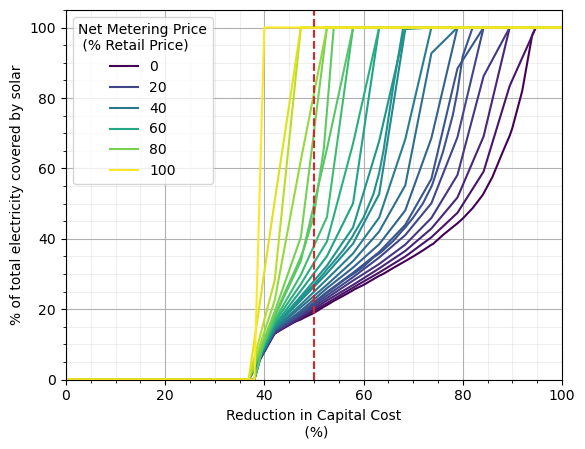

In [12]:
fig, ax = plt.subplots()
sb.lineplot(data=df[['discount','solar_penetration','percent_retail_price']]*100,
            x='discount',
            y='solar_penetration',
            ax=ax,
            hue='percent_retail_price',
            palette='viridis')

ax.set_ylabel("% of total electricity covered by solar")
ax.set_xlabel("Reduction in Capital Cost\n (%)")
ax.legend(title='Net Metering Price\n (% Retail Price)')

ax.minorticks_on()
ax.grid(which='major')
ax.grid(which='minor', alpha=0.2)
ax.set_ylim(0,1.05*100)
ax.set_xlim(0,1.0*100)

ax.axvline(x=50, color='tab:red', linestyle='--')